<a href="https://colab.research.google.com/github/ThiagoVisentimLopes/DataScience/blob/master/UtilizacaoPeneira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulação inicial dos dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
# Leitura do arquivo Excel]
#df = pd.read_excel('Peneira.xlsx', sheet_name='Peneira',header=1)
df = pd.read_excel('Peneira.xlsx', sheet_name='Peneira',header=1)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[1], axis=1)


In [ ]:
# Selecionar as linhas 1, 2 e 3 e somar os valores
total_linhas = df.iloc[[1, 2, 3], :].sum()

# Adicionar uma nova linha com o total das linhas selecionadas
df.loc['Total'] = total_linhas

In [ ]:
df = df.set_index('DIA').T
df.rename(columns={"PRODUÇÃO TERRAPRODUÇÃO FLUFFPRODUÇÃO RECT": "Total"}, inplace=True) 
df.rename(columns={"TEMPO DE PARADA (horas)": "Tempo Parada"}, inplace=True) 

# Substituir os valores NaN da coluna "Tempo Parada Acumulado" por 0
df['Tempo Parada'] = df['Tempo Parada'].fillna(0)

In [ ]:
df['diasNumerados'] = range(1, len(df)+1)

In [ ]:
df['Total Acumulado'] = df['Total'].cumsum()

In [ ]:
df['Tempo Parada Acumulado'] = df['Tempo Parada'].cumsum()

In [ ]:
df0 = df.iloc[:13, :].copy()

df13 = df.iloc[13:, :].copy()

In [ ]:
df13['Total Acumulado Novo'] = df13['Total'].cumsum()

In [ ]:
df13['Tempo Parada Acumulado Novo'] = df13['Tempo Parada'].cumsum()

In [ ]:
#Gerando dados de teste
TesteDf13 = pd.DataFrame({'diasNumerados': range(0, 14)})
TesteDf0 = pd.DataFrame({'diasNumerados': range(14, 31)})
TesteDf13Inicio = pd.DataFrame({'diasNumerados': range(18, 31)})

In [ ]:
dias = pd.DataFrame({'Dia': range(1, 31)})

In [ ]:
df13['diasNumeradosInicio'] = range(1, 18)

# Regressão linear para DF0 treina com dados até dia 13 e prevê do dia 13 em diante

In [ ]:
#Regressão para Total
regDf0 = LinearRegression().fit(np.array(df0['diasNumerados']).reshape(-1, 1), df0['Total Acumulado'])
LinearPredictDf0 = regDf0.predict(TesteDf0)

#Regressão para Parada
regDf0 = LinearRegression().fit(np.array(df0['diasNumerados']).reshape(-1, 1), df0['Tempo Parada Acumulado'])
LinearPredictDf0Parada = regDf0.predict(TesteDf0)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Regressão linear para DF13 treina com dados do dia 13 em diante e preve antes do dia 13

In [ ]:
#Regressão para Total
regDf13 = LinearRegression().fit(np.array(df13['diasNumerados']).reshape(-1, 1), df13['Total Acumulado'])
LinearPredictDf13 = regDf13.predict(TesteDf13)

#Regressão para Parada
regDf13 = LinearRegression().fit(np.array(df13['diasNumerados']).reshape(-1, 1), df13['Tempo Parada Acumulado'])
LinearPredictDf13Parada = regDf13.predict(TesteDf13)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
dataTeste = pd.DataFrame({'novaDATA': range(18, 31)})

# Apenas teste SVR

In [ ]:
# Importar pacotes necessários
#from sklearn.svm import SVR
#from sklearn.metrics import mean_squared_error

# Separar dados em treino e teste
#X_train = np.array(df13.head(13)['diasNumeradosInicio']).reshape(-1, 1)
#y_train = df13.head(13)['Total Acumulado Novo']

# Definir modelo SVM
#model = SVR(kernel='rbf')

# Treinar modelo
#model.fit(X_train, y_train)

# Fazer previsão
#y_pred = model.predict(TesteDf13Inicio)

# Avaliar desempenho do modelo
#mse = mean_squared_error(df13['Total Acumulado Novo'], y_pred)
#print("Erro quadrático médio do modelo: {:.2f}".format(mse))

# DF13 Treina com dados até dia 13 e prevê as demais

In [ ]:
#regDf13Inicio = LinearRegression().fit(np.array(df13['diasNumeradosInicio']).reshape(-1, 1), df13['Total Acumulado Novo'])
#LinearPredictDf13Inicio = regDf13Inicio.predict(TesteDf13Inicio)

In [ ]:
LinearPredictDf13_pos = np.clip(LinearPredictDf13, a_min=0, a_max=None)
LinearPredictDf13_posParada = np.clip(LinearPredictDf13Parada, a_min=0, a_max=None)

# DF13 Novos valores Total Acumulado equação 2° Grau

In [ ]:
#Equação segundo grau Total Acumulado Novo

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train = np.array(df13['diasNumeradosInicio']).reshape(-1, 1)
y_train = df13['Total Acumulado Novo']

# Normalizar dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Definir modelo SVM
model = SVR(kernel='poly',gamma="auto", degree=2, C=6.68, epsilon=0.1, coef0=30)
##model = SVR(kernel='poly',gamma="auto", degree=2, C=25, epsilon=0.5, coef0=1) Melhor até agora
#model = SVR(kernel='poly',gamma="auto", C=300,degree=2,epsilon=30)

# Treinar modelo
model.fit(X_train_norm, y_train)

# Normalizar dados de teste
X_test_norm = scaler.transform(TesteDf13Inicio)

# Fazer previsão
y_pred = model.predict(X_test_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
y_pred

array([2279.29695898, 2434.75772287, 2594.27751454, 2757.85633398,
       2925.49418121, 3097.19105621, 3272.94695898, 3452.76188954,
       3636.63584787, 3824.56883398, 4016.56084787, 4212.61188954,
       4412.72195898])

Linear

In [ ]:
#Regressão para Total
#regDf13 = LinearRegression().fit(np.array(df13['diasNumeradosInicio']).reshape(-1, 1), df13['Total Acumulado Novo'])
#y_pred = regDf13.predict(TesteDf13Inicio)

In [ ]:
# Calculando a média móvel simples (SMA) dos últimos 5 dias de produção
n = 5
sma = df13['Total Acumulado Novo'].rolling(window=n).mean()

# Projeta a produção para os próximos 17 dias, com base na SMA calculada
n_prox = 17
prox_dias = range(14, 14 + n_prox)
prox_producao = [sma.mean()] * n_prox

# Armazena a projeção de todos os dias em um vetor
producao_total = np.concatenate((df13['Total Acumulado Novo'].values, prox_producao))

In [ ]:
producao_total

array([256.1, 458.71000000000004, 543.2900000000001, 543.2900000000001,
       662.8900000000001, 662.8900000000001, 662.8900000000001,
       785.1100000000001, 940.0600000000002, 1154.8700000000001, 1423.43,
       1423.43, 1423.43, 1697.944, 1947.994, 2104.594, 2510.784,
       1077.3427692307691, 1077.3427692307691, 1077.3427692307691,
       1077.3427692307691, 1077.3427692307691, 1077.3427692307691,
       1077.3427692307691, 1077.3427692307691, 1077.3427692307691,
       1077.3427692307691, 1077.3427692307691, 1077.3427692307691,
       1077.3427692307691, 1077.3427692307691, 1077.3427692307691,
       1077.3427692307691, 1077.3427692307691], dtype=object)

# DF13 Novos valores Tempo Parada Acumulado equação 2° Grau

In [ ]:
#Equação segundo grau

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train = np.array(df13['diasNumeradosInicio']).reshape(-1, 1)
y_train = df13['Tempo Parada Acumulado Novo']

# Normalizar dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Definir modelo SVM
#model = SVR(kernel='poly',gamma="auto", degree=2, C=40, epsilon=0.1, coef0=30)
##model = SVR(kernel='poly',gamma="auto", degree=2, C=25, epsilon=0.5, coef0=1) Melhor até agora
model = SVR(kernel='poly',gamma="auto", degree=1, C=2, epsilon=0.5, coef0=1)

# Treinar modelo
model.fit(X_train_norm, y_train)

# Normalizar dados de teste
X_test_norm = scaler.transform(TesteDf13Inicio)

# Fazer previsão
y_predParada = model.predict(X_test_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# Ignorar Polinomial por enquanto. a de cima ja resolve.

In [ ]:
#POLINOMIAL

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train = np.array(df13['diasNumeradosInicio']).reshape(-1, 1)
y_train = df13['Total Acumulado Novo']

# Normalizar dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Definir modelo SVM
#model = SVR(kernel='poly',gamma="auto", degree=2, C=20, epsilon=0.3, coef0=3)
#model = SVR(kernel='poly',gamma="auto", degree=2, C=25, epsilon=0.5, coef0=1)
#model = SVR(kernel='poly',gamma="auto", degree=3, C=1, epsilon=3, coef0=1)
# Treinar modelo
model.fit(X_train_norm, y_train)

# Normalizar dados de teste
X_test_norm = scaler.transform(TesteDf13Inicio)

# Fazer previsão
y_predPoli = model.predict(X_test_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
len(np.array(df13['diasNumeradosInicio']).reshape(-1, 1))

17

# Teste de erro

In [ ]:
# Calcular RMSE
y_true = df.tail(13)['Total Acumulado'] # valores reais da variável de destino no conjunto de teste
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE:', rmse)

RMSE: 1383.901900539623


# DF0 Ignorar por enquanto (ficou abaixo do acumulado, estranho)

In [ ]:
#APENAS TESTE DF0

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train = np.array(df0['diasNumerados']).reshape(-1, 1)
y_train = df0['Total Acumulado']

# Normalizar dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Definir modelo SVM
model = SVR(kernel='poly', degree=3, C=10, epsilon=0.1, coef0=50)

# Treinar modelo
model.fit(X_train_norm, y_train)

# Normalizar dados de teste
X_test_norm = scaler.transform(TesteDf0)

# Fazer previsão
y_pred2 = model.predict(X_test_norm)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
y_pred

array([2279.29695898, 2434.75772287, 2594.27751454, 2757.85633398,
       2925.49418121, 3097.19105621, 3272.94695898, 3452.76188954,
       3636.63584787, 3824.56883398, 4016.56084787, 4212.61188954,
       4412.72195898])

In [ ]:
y_pred

array([2279.29695898, 2434.75772287, 2594.27751454, 2757.85633398,
       2925.49418121, 3097.19105621, 3272.94695898, 3452.76188954,
       3636.63584787, 3824.56883398, 4016.56084787, 4212.61188954,
       4412.72195898])

In [ ]:
X_train

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13]])

In [ ]:
TesteDf13Inicio

,diasNumerados
0,18
1,19
2,20
3,21
4,22
5,23
6,24
7,25
8,26
9,27


In [ ]:
df13['diasNumeradosInicio']

14     1
15     2
16     3
17     4
18     5
19     6
20     7
21     8
22     9
23    10
24    11
25    12
26    13
27    14
28    15
29    16
30    17
Name: diasNumeradosInicio, dtype: int64

# Gráfico Total acumulado

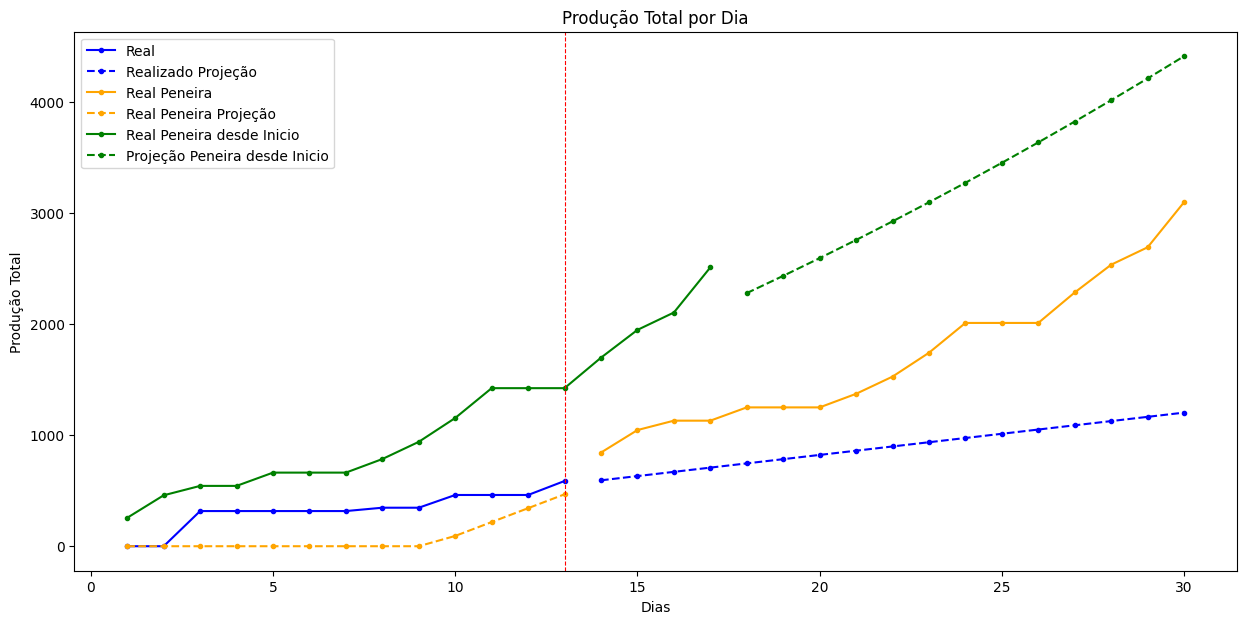

In [ ]:
# plotar gráfico de linha
plt.figure(figsize=(15,7))
#conjunto1
plt.plot(df0['diasNumerados'], df0['Total Acumulado'],color='blue',label='Real',marker='.')
plt.plot(TesteDf0['diasNumerados'], LinearPredictDf0,color='blue', linestyle='--',label='Realizado Projeção',marker='.')
#plt.plot(TesteDf0['diasNumerados'], y_pred2,color='red', linestyle='--',label='Realizado Projeção',marker='.')
#conjunto2
plt.plot(df13['diasNumerados'], df13['Total Acumulado'],color='orange',label='Real Peneira',marker='.')
plt.plot(TesteDf13['diasNumerados'].shift(-1), LinearPredictDf13_pos,color='orange', linestyle='--',label='Real Peneira Projeção',marker='.')

#conjunto3
plt.plot(df13['diasNumeradosInicio'], df13['Total Acumulado Novo'],color='green', linestyle='-',label='Real Peneira desde Inicio',marker='.')
plt.plot(TesteDf13Inicio['diasNumerados'].to_numpy(), y_pred,color='green', linestyle='--',label='Projeção Peneira desde Inicio',marker='.')
#plt.plot(TesteDf13Inicio['diasNumerados'].to_numpy(), y_predPoli,color='black', linestyle='--',label='Projeção Peneira desde Inicio',marker='.')

plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
# adicionar título ao gráfico
plt.title('Produção Total por Dia')

# adicionar rótulos nos eixos x e y
plt.xlabel('Dias')
plt.ylabel('Produção Total')

# adicionar legenda

#linhas horizontas
#for y in range(0,5000,500):
 #   plt.axhline(y=y, color='gray', linestyle='--')

plt.legend()
# exibir o gráfico

plt.show()

In [ ]:
LinearPredictDf0

array([ 593.53769231,  631.64208791,  669.74648352,  707.85087912,
        745.95527473,  784.05967033,  822.16406593,  860.26846154,
        898.37285714,  936.47725275,  974.58164835, 1012.68604396,
       1050.79043956, 1088.89483516, 1126.99923077, 1165.10362637,
       1203.20802198])

In [ ]:
y_pred

array([2279.29695898, 2434.75772287, 2594.27751454, 2757.85633398,
       2925.49418121, 3097.19105621, 3272.94695898, 3452.76188954,
       3636.63584787, 3824.56883398, 4016.56084787, 4212.61188954,
       4412.72195898])

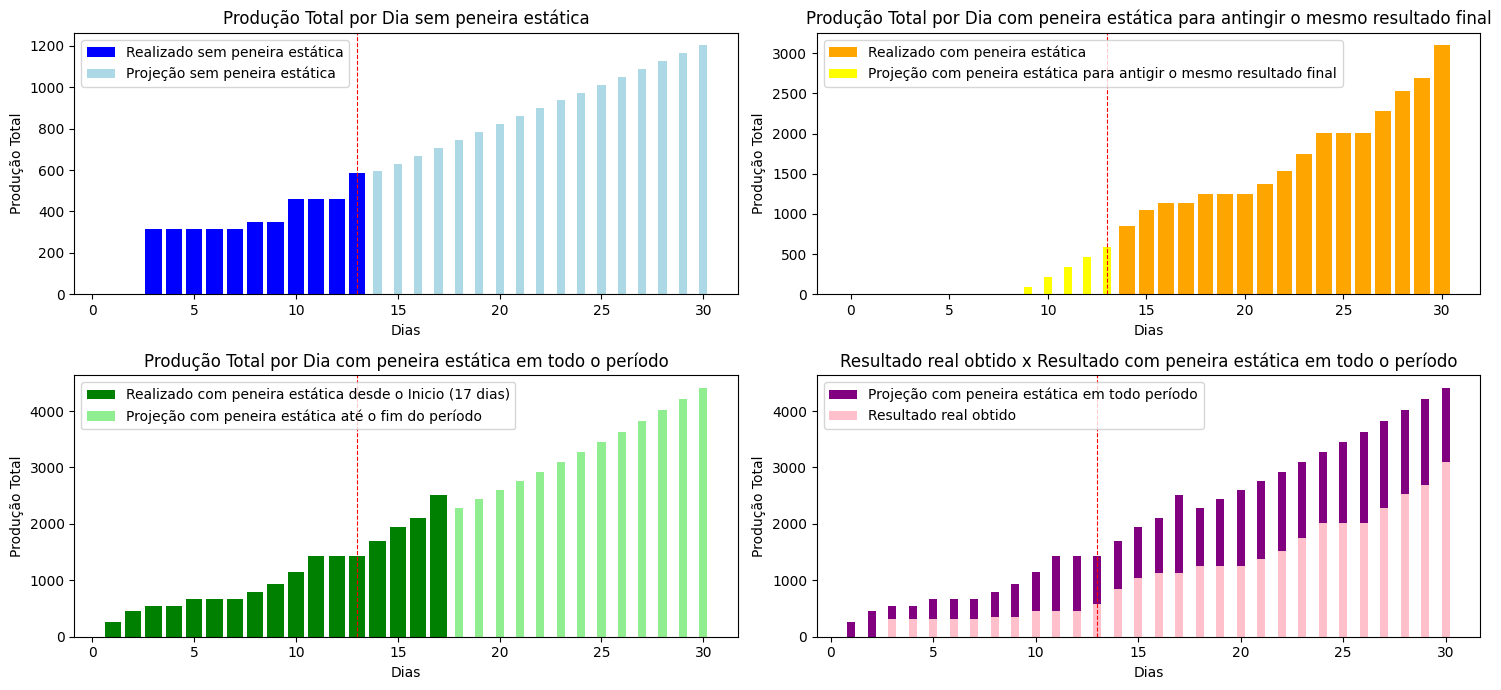

In [ ]:
# plotar gráfico de barras
plt.figure(figsize=(15,7))

bar_width = 0.4

# primeiro conjunto de dados
plt.subplot(2,2,1)
plt.bar(df0['diasNumerados'], df0['Total Acumulado'], color='blue', label='Realizado sem peneira estática')
plt.bar(TesteDf0['diasNumerados'], LinearPredictDf0, color='lightblue', label='Projeção sem peneira estática', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Produção Total por Dia sem peneira estática')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

# segundo conjunto de dados
plt.subplot(2,2,2)
plt.bar(df13['diasNumerados'], df13['Total Acumulado'], color='orange', label='Realizado com peneira estática')
plt.bar(TesteDf13['diasNumerados'], LinearPredictDf13_pos, color='yellow', label='Projeção com peneira estática para antigir o mesmo resultado final', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Produção Total por Dia com peneira estática para antingir o mesmo resultado final')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

# terceiro conjunto de dados
plt.subplot(2,2,3)
plt.bar(df13['diasNumeradosInicio'], df13['Total Acumulado Novo'], color='green', label='Realizado com peneira estática desde o Inicio (17 dias)')
plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_pred, color='lightgreen', label='Projeção com peneira estática até o fim do período', width=bar_width)
#plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_predPoli, color='red', label='Projeção com peneira estática até o fim do período', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Produção Total por Dia com peneira estática em todo o período')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

# quarto conjunto de dados
plt.subplot(2,2,4)

plt.bar(df13['diasNumeradosInicio'], df13['Total Acumulado Novo'], color='purple', width=bar_width)
plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_pred, color='purple', label='Projeção com peneira estática em todo período', width=bar_width)
plt.bar(df['diasNumerados'], df['Total Acumulado'], color='pink', label='Resultado real obtido', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Resultado real obtido x Resultado com peneira estática em todo o período')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

plt.tight_layout()

# exibir o gráfico
plt.show()

# Gráficos de parada

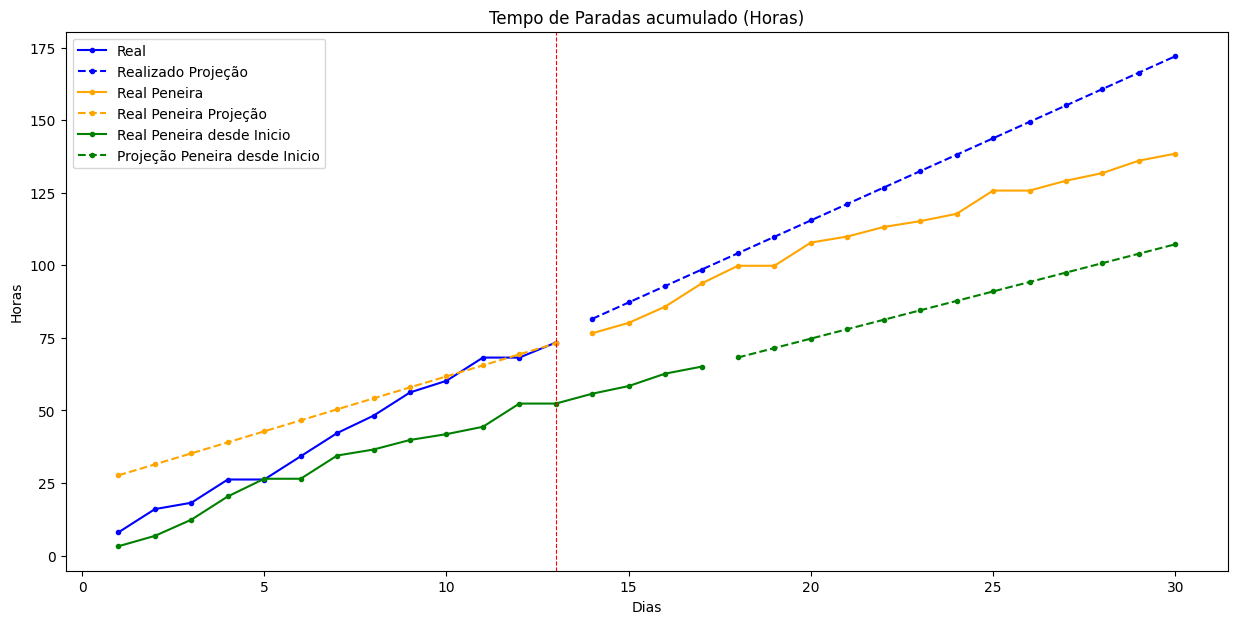

In [ ]:
# plotar gráfico de linha
plt.figure(figsize=(15,7))
#conjunto1
plt.plot(df0['diasNumerados'], df0['Tempo Parada Acumulado'],color='blue',label='Real',marker='.')
plt.plot(TesteDf0['diasNumerados'], LinearPredictDf0Parada,color='blue', linestyle='--',label='Realizado Projeção',marker='.')
#plt.plot(TesteDf0['diasNumerados'], y_pred2,color='red', linestyle='--',label='Realizado Projeção',marker='.')
#conjunto2
plt.plot(df13['diasNumerados'], df13['Tempo Parada Acumulado'],color='orange',label='Real Peneira',marker='.')
plt.plot(TesteDf13['diasNumerados'].shift(-1), LinearPredictDf13_posParada,color='orange', linestyle='--',label='Real Peneira Projeção',marker='.')

#conjunto3
plt.plot(df13['diasNumeradosInicio'], df13['Tempo Parada Acumulado Novo'],color='green', linestyle='-',label='Real Peneira desde Inicio',marker='.')
plt.plot(TesteDf13Inicio['diasNumerados'].to_numpy(), y_predParada,color='green', linestyle='--',label='Projeção Peneira desde Inicio',marker='.')
#plt.plot(TesteDf13Inicio['diasNumerados'].to_numpy(), y_predPoli,color='black', linestyle='--',label='Projeção Peneira desde Inicio',marker='.')

plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
# adicionar título ao gráfico
plt.title('Tempo de Paradas acumulado (Horas)')

# adicionar rótulos nos eixos x e y
plt.xlabel('Dias')
plt.ylabel('Horas')

# adicionar legenda

#linhas horizontas
#for y in range(0,5000,500):
 #   plt.axhline(y=y, color='gray', linestyle='--')

plt.legend()
# exibir o gráfico

plt.show()

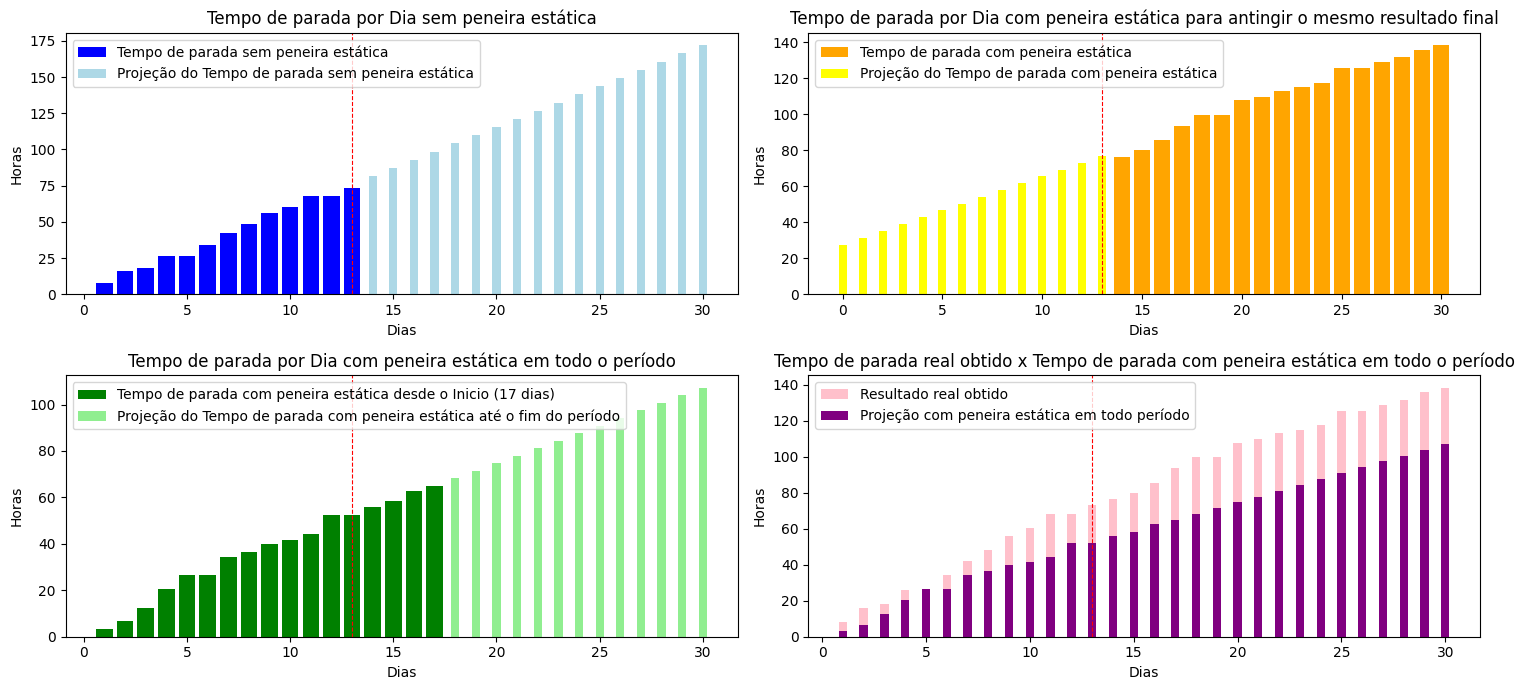

In [ ]:
# plotar gráfico de barras
plt.figure(figsize=(15,7))

bar_width = 0.4

# primeiro conjunto de dados
plt.subplot(2,2,1)
plt.bar(df0['diasNumerados'], df0['Tempo Parada Acumulado'], color='blue', label='Tempo de parada sem peneira estática')
plt.bar(TesteDf0['diasNumerados'], LinearPredictDf0Parada, color='lightblue', label='Projeção do Tempo de parada sem peneira estática', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Tempo de parada por Dia sem peneira estática')
plt.xlabel('Dias')
plt.ylabel('Horas')
plt.legend()

# segundo conjunto de dados
plt.subplot(2,2,2)
plt.bar(df13['diasNumerados'], df13['Tempo Parada Acumulado'], color='orange', label='Tempo de parada com peneira estática')
plt.bar(TesteDf13['diasNumerados'], LinearPredictDf13_posParada, color='yellow', label='Projeção do Tempo de parada com peneira estática', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Tempo de parada por Dia com peneira estática para antingir o mesmo resultado final')
plt.xlabel('Dias')
plt.ylabel('Horas')
plt.legend()

# terceiro conjunto de dados
plt.subplot(2,2,3)
plt.bar(df13['diasNumeradosInicio'], df13['Tempo Parada Acumulado Novo'], color='green', label='Tempo de parada com peneira estática desde o Inicio (17 dias)')
plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_predParada, color='lightgreen', label='Projeção do Tempo de parada com peneira estática até o fim do período', width=bar_width)
#plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_predPoli, color='red', label='Projeção com peneira estática até o fim do período', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Tempo de parada por Dia com peneira estática em todo o período')
plt.xlabel('Dias')
plt.ylabel('Horas')
plt.legend()

# quarto conjunto de dados
plt.subplot(2,2,4)
plt.bar(df['diasNumerados'], df['Tempo Parada Acumulado'], color='pink', label='Resultado real obtido', width=bar_width)
plt.bar(df13['diasNumeradosInicio'], df13['Tempo Parada Acumulado Novo'], color='purple', width=bar_width)
plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_predParada, color='purple', label='Projeção com peneira estática em todo período', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)


plt.title('Tempo de parada real obtido x Tempo de parada com peneira estática em todo o período')
plt.xlabel('Dias')
plt.ylabel('Horas')
plt.legend()

plt.tight_layout()

# exibir o gráfico
plt.show()

In [ ]:
y_predParada

array([ 68.22499999,  71.47499999,  74.72499999,  77.97499999,
        81.22499999,  84.47499999,  87.72499999,  90.97499999,
        94.22499999,  97.47499999, 100.72499999, 103.97499999,
       107.22499999])

In [ ]:
df0['relacao'] = df0['Total Acumulado']/ df0['Tempo Parada Acumulado']
df13['relacao'] = df13['Total Acumulado Novo'] / df13['Tempo Parada Acumulado Novo']

In [ ]:
df0['Total Acumulado']

1          0
2          0
3     316.66
4     316.66
5     316.66
6     316.66
7     316.66
8     346.78
9     346.78
10    461.42
11    461.42
12    461.42
13    587.37
Name: Total Acumulado, dtype: object

In [ ]:
df0['Tempo Parada Acumulado']

1      8.00
2     16.00
3     18.19
4     26.19
5     26.19
6     34.19
7     42.19
8     48.19
9     56.19
10    60.19
11    68.19
12    68.19
13    73.37
Name: Tempo Parada Acumulado, dtype: float64

Essa relação representa a razão entre o total produzido e o tempo de parada acumulado em um determinado equipamento (ou grupo de equipamentos) em um determinado período de tempo.

Por exemplo, se a relação para um equipamento em um determinado período de tempo é igual a 10, isso significa que foram produzidas 10 unidades do produto para cada hora de tempo de parada acumulado. Quanto maior for essa relação, melhor é o desempenho do equipamento ou do grupo de equipamentos em termos de eficiência de produção.
